In [1]:
import csv
import numpy as np
import pandas as pd
from time import time
import math
import seaborn as sns
import matplotlib.pyplot as plt


Bad key savefig.frameon in file /opt/anaconda3/envs/kyc-py36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/kyc-py36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/kyc-py36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [3]:
raw_df = pd.read_csv('HF-DATA.csv')
raw_df

,Hz,dB,correct,age,gender,subjecy No.
0,1500,32,2,20,1,1
1,3000,32,7,20,1,1
2,4500,32,10,20,1,1
3,6000,32,9,20,1,1
4,7500,32,8,20,1,1
...,...,...,...,...,...,...
211,0,0,10,22,1,8
212,0,0,7,22,1,9
213,0,0,8,22,1,9
214,0,0,10,22,1,9


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Hz           216 non-null    int64
 1   dB           216 non-null    int64
 2   correct      216 non-null    int64
 3   age          216 non-null    int64
 4   gender       216 non-null    int64
 5   subjecy No.  216 non-null    int64
dtypes: int64(6)
memory usage: 10.2 KB


In [9]:
num_df = raw_df[['Hz','dB','correct','age ']]
num_df

,Hz,dB,correct,age
0,1500,32,2,20
1,3000,32,7,20
2,4500,32,10,20
3,6000,32,9,20
4,7500,32,8,20
...,...,...,...,...
211,0,0,10,22
212,0,0,7,22
213,0,0,8,22
214,0,0,10,22


In [15]:
num_df[:180]

,Hz,dB,correct,age
0,1500,32,2,20
1,3000,32,7,20
2,4500,32,10,20
3,6000,32,9,20
4,7500,32,8,20
...,...,...,...,...
175,1500,80,6,22
176,3000,80,7,22
177,4500,80,4,22
178,6000,80,3,22


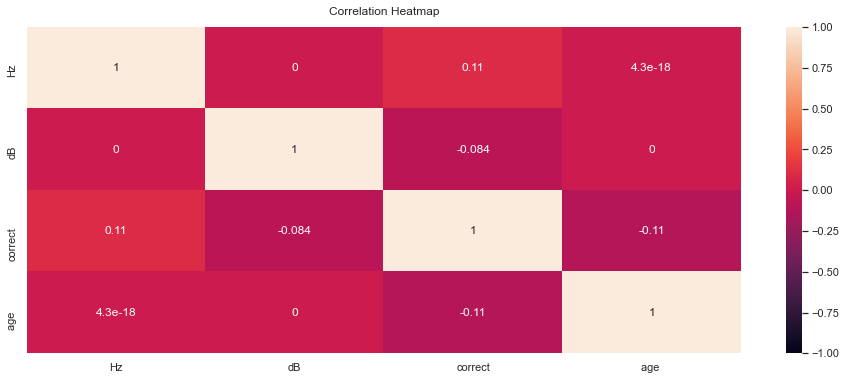

In [16]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(num_df[:180].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

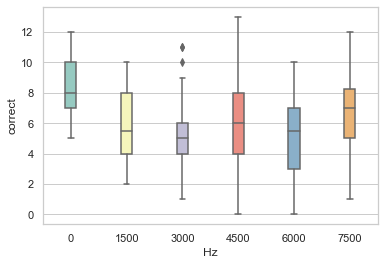

In [18]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = "Hz", y = "correct", data = num_df[['Hz','correct']], width=0.2, palette="Set3")

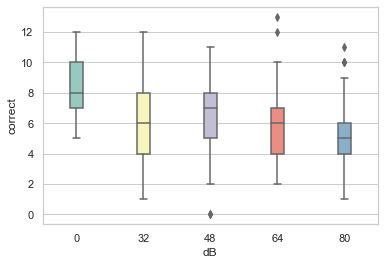

In [19]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = "dB", y = "correct", data = num_df[['dB','correct']], width=0.2, palette="Set3")

In [21]:
rr = []
for a in list(num_df['dB']):
    b = 'Quiet'
    if a != 0:
        b = 'Noise'
    rr.append(b)
num_df['Noise'] = rr
num_df

/opt/anaconda3/envs/kyc-py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Hz,dB,correct,age,Noise
0,1500,32,2,20,Noise
1,3000,32,7,20,Noise
2,4500,32,10,20,Noise
3,6000,32,9,20,Noise
4,7500,32,8,20,Noise
...,...,...,...,...,...
211,0,0,10,22,Quiet
212,0,0,7,22,Quiet
213,0,0,8,22,Quiet
214,0,0,10,22,Quiet


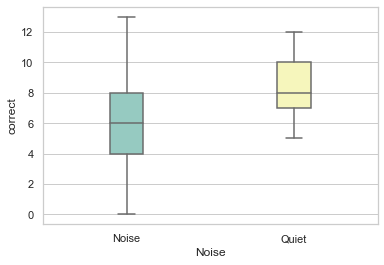

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = "Noise", y = "correct", data = num_df[['Noise','correct']], width=0.2, palette="Set3")

In [27]:
# 檢查無噪音之資料是否為常態分佈
import scipy.stats
dat1 = num_df[num_df['Noise'] == 'Quiet']
scipy.stats.shapiro(list(dat1['correct']))


ShapiroResult(statistic=0.9119737148284912, pvalue=0.007371705025434494)

In [28]:
# 檢查有噪音之資料是否為常態分佈
import scipy.stats
dat1 = num_df[num_df['Noise'] == 'Noise']
scipy.stats.shapiro(list(dat1['correct']))

ShapiroResult(statistic=0.977055013179779, pvalue=0.00456971162930131)

In [34]:
dat1 = list(num_df[num_df['Hz'] == 0]['correct'])
dat2 = list(num_df[num_df['Hz'] == 1500]['correct'])
dat3 = list(num_df[num_df['Hz'] == 3000]['correct'])
dat4 = list(num_df[num_df['Hz'] == 4500]['correct'])
dat5 = list(num_df[num_df['Hz'] == 6000]['correct'])
dat6 = list(num_df[num_df['Hz'] == 7500]['correct'])

In [35]:
import scipy.stats
scipy.stats.f_oneway(dat1, dat2, dat3, dat4,dat5,dat6)

F_onewayResult(statistic=8.5995622276829, pvalue=1.9804529095684933e-07)

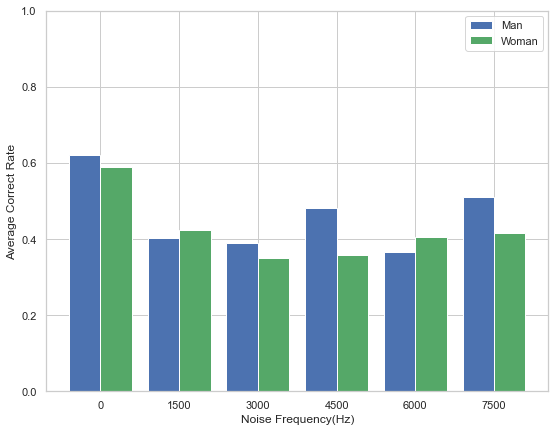

In [68]:
x = ['0','1500','3000','4500','6000','7500']
raw_df['correct_rate'] = raw_df['correct']/14
man_df = raw_df[raw_df['gender '] == 1]
a = man_df.groupby(['Hz'])['correct_rate'].agg('mean').to_dict()
woman_df = raw_df[raw_df['gender '] == 2]
b = woman_df.groupby(['Hz'])['correct_rate'].agg('mean').to_dict()
X_axis = np.arange(len(x))

plt.subplots(figsize=(9, 7))
plt.bar(X_axis - 0.2, a.values(), 0.4, label = 'Man')
plt.bar(X_axis + 0.2, b.values(), 0.4, label = 'Woman')
plt.ylim((0, 1)) 
plt.xticks(X_axis, x)
plt.xlabel("Noise Frequency(Hz)")
plt.ylabel("Average Correct Rate")
plt.legend()
plt.style.use('seaborn-deep')

dict

In [70]:
# 有無噪音變異數比較
dat1 = list(num_df[num_df['Noise'] == 'Noise']['correct'])
dat2 = list(num_df[num_df['Noise'] == 'Quiet']['correct'])
scipy.stats.f_oneway(dat1, dat2)

F_onewayResult(statistic=33.86279227663096, pvalue=2.1391174719767304e-08)

In [73]:
# 性別變異數比較
dat1 = list(raw_df[raw_df['gender '] == 1]['correct'])
dat2 = list(raw_df[raw_df['gender '] == 2]['correct'])
scipy.stats.f_oneway(dat1, dat2)

F_onewayResult(statistic=1.8759758279949175, pvalue=0.17222770054304465)

In [74]:
# 分貝變異數比較
dat1 = list(num_df[num_df['dB'] == 0 ]['correct'])
dat2 = list(num_df[num_df['dB'] == 32 ]['correct'])
dat3 = list(num_df[num_df['dB'] == 48 ]['correct'])
dat4 = list(num_df[num_df['dB'] == 64 ]['correct'])
dat5 = list(num_df[num_df['dB'] == 80 ]['correct'])
scipy.stats.f_oneway(dat1, dat2,dat3,dat4,dat5)

F_onewayResult(statistic=9.233736042633408, pvalue=6.796874746074494e-07)